# Housing Price Prediction 

In this file I provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.

# Summary

The dataset provides comprehensive information for house price prediction, with 13 column names:
1.Price: The price of the house.
2.Area: The total area of the house in square feet.
3.Bedrooms: The number of bedrooms in the house.
4.Bathrooms: The number of bathrooms in the house.
5.Stories: The number of stories in the house.
6.Mainroad: Whether the house is connected to the main road (Yes/No).
7.Guestroom: Whether the house has a guest room (Yes/No).
8.Basement: Whether the house has a basement (Yes/No).
9.Hot water heating: Whether the house has a hot water heating system (Yes/No).
10.Airconditioning: Whether the house has an air conditioning system (Yes/No).
11.Parking: The number of parking spaces available within the house.
12.Prefarea: Whether the house is located in a preferred area (Yes/No).
13.Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

# Training Environment

All the tasks have been performed in the free version of the Jupyter notebook.

# Import necessary libraries

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Load the dataset
data = pd.read_csv("C:\\Users\\HP\\Desktop\\ujwala ds project\\Datasets\\Housing.csv")

In [52]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data preprocessing

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
for i in data.columns:
  dis = len(data[i].unique())
  print(f"{i} - {dis}")

price - 219
area - 284
bedrooms - 6
bathrooms - 4
stories - 4
mainroad - 2
guestroom - 2
basement - 2
hotwaterheating - 2
airconditioning - 2
parking - 4
prefarea - 2
furnishingstatus - 3


In [56]:
data['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [57]:
data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [58]:
from sklearn.preprocessing import OrdinalEncoder

In [61]:
enc = OrdinalEncoder()
data['mainroad'] = enc.fit_transform(data[['mainroad']])
data['guestroom'] = enc.fit_transform(data[['guestroom']])
data['basement'] = enc.fit_transform(data[['basement']])
data['hotwaterheating'] = enc.fit_transform(data[['hotwaterheating']])
data['airconditioning'] = enc.fit_transform(data[['airconditioning']])
data['prefarea'] = enc.fit_transform(data[['prefarea']])

In [62]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [63]:
rank=['unfurnished','semi-furnished','furnished']
oe = OrdinalEncoder(categories=[rank])
data['furnishingstatus']=oe.fit_transform(data[['furnishingstatus']])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='price', ylabel='Density'>

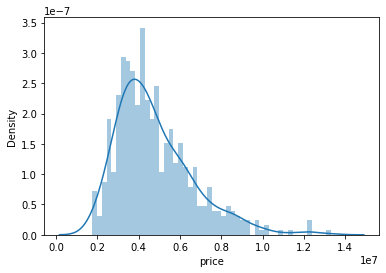

In [65]:
sns.distplot(data['price'], bins=50)

<AxesSubplot:xlabel='area', ylabel='Density'>

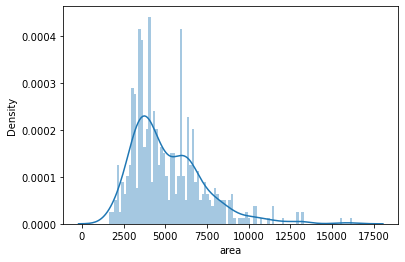

In [66]:
sns.distplot(data['area'], bins=100)

<AxesSubplot:xlabel='price', ylabel='area'>

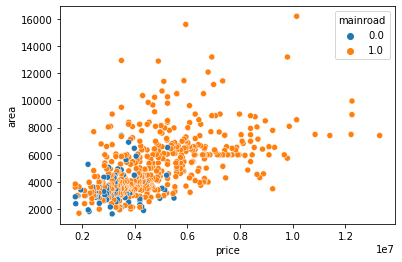

In [67]:
sns.scatterplot(x='price', y='area', hue='mainroad', data=data)

<AxesSubplot:xlabel='price', ylabel='area'>

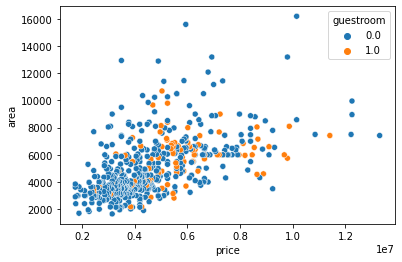

In [68]:
sns.scatterplot(x='price', y='area', hue='guestroom', data=data)

<AxesSubplot:xlabel='price', ylabel='area'>

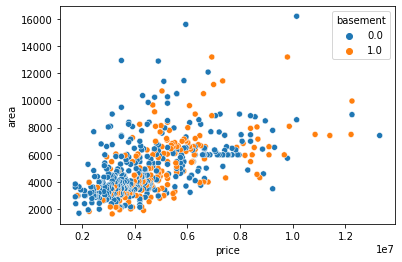

In [69]:
sns.scatterplot(x='price', y='area', hue='basement', data=data)

<AxesSubplot:xlabel='price', ylabel='area'>

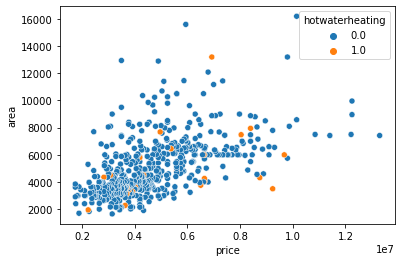

In [70]:
sns.scatterplot(x='price', y='area', hue='hotwaterheating', data=data)

<AxesSubplot:xlabel='price', ylabel='area'>

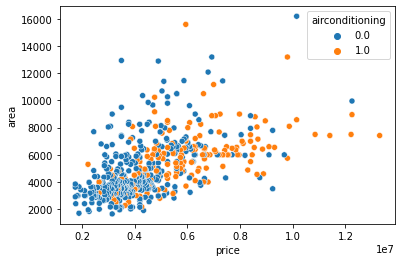

In [71]:
sns.scatterplot(x='price', y='area', hue='airconditioning', data=data)

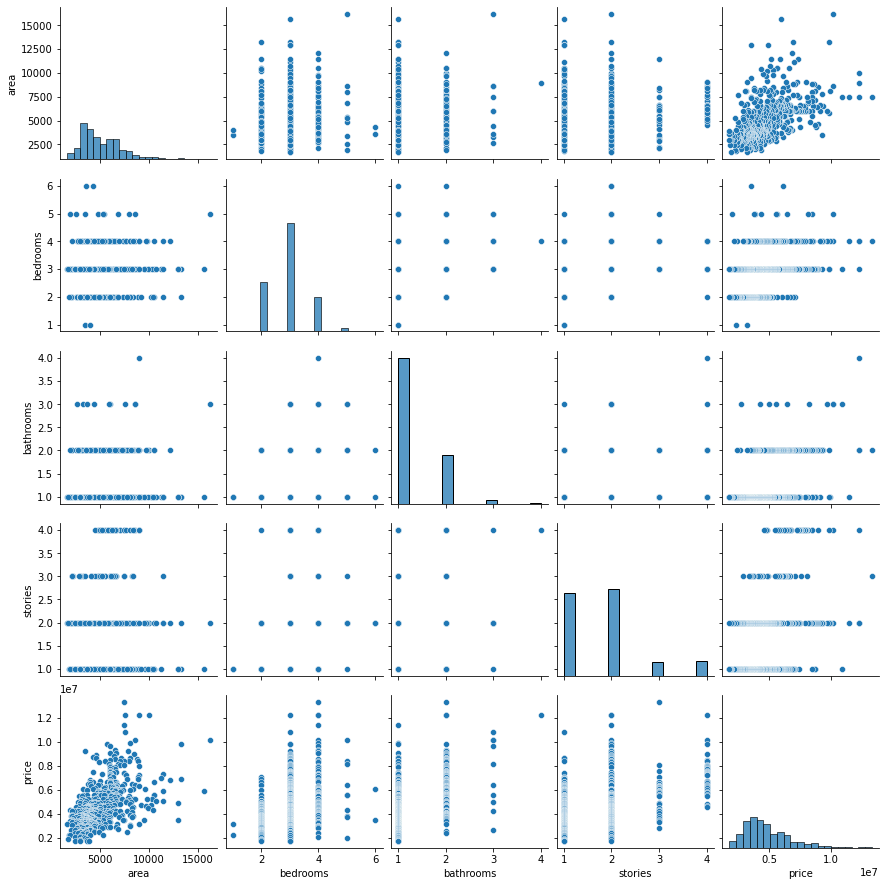

In [72]:
sns.pairplot(vars=['area','bedrooms','bathrooms','stories','price'],data=data)

<AxesSubplot:>

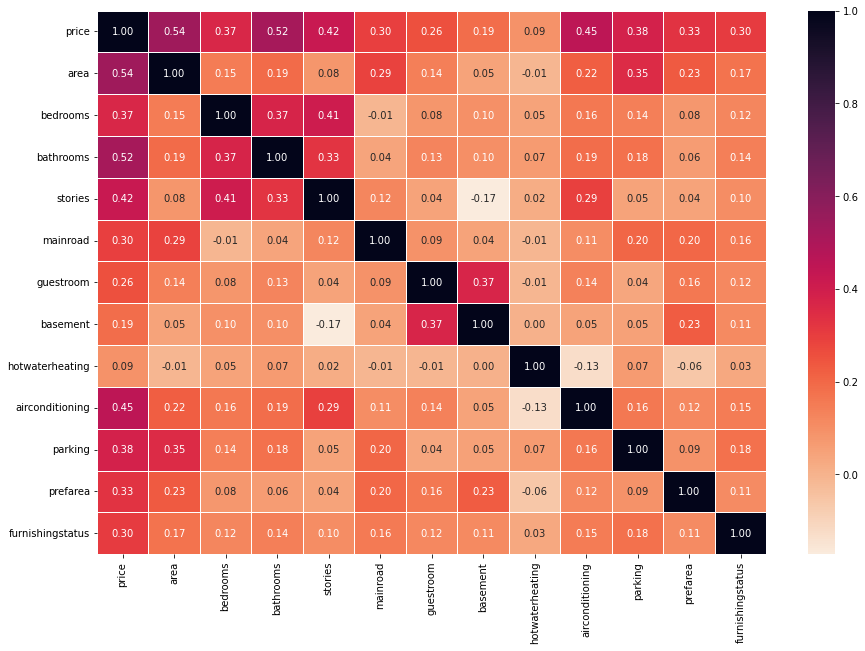

In [73]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

In [74]:
X=data.drop(['price'],axis=1)
y=data['price']

In [75]:
X.shape

(545, 12)

In [77]:
y.shape


(545,)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training

In [79]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)
#y_train=scalar.fit_transform(y_train.values.reshape(-1, 1))
#y_test=scalar.fit_transform(y_test.values.reshape(-1, 1))

In [80]:
X_train

array([[0.45360825, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.19587629, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22680412, 0.6       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.14776632, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30034364, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.13745704, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [81]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [82]:
reg.fit(X_train,y_train)

LinearRegression()

# Prediction

In [83]:
y_pred = reg.predict(X_test)

In [84]:
y_test

351    3780000
90     6440000
497    2660000
416    3395000
85     6510000
        ...   
354    3780000
486    2870000
356    3773000
152    5565000
37     7980000
Name: price, Length: 109, dtype: int64

In [85]:
y_pred

array([2878567.34056439, 4700688.94412717, 2730286.58099004,
       3639900.54892889, 7727358.46536937, 2744191.84312396,
       6830211.05177225, 3235144.37644819, 5833082.73138637,
       4373973.73803463, 4063988.32767004, 8052101.71812466,
       8719958.48092263, 6774253.32248803, 7436655.52580963,
       8211159.7188394 , 6352759.38076037, 3881256.69325107,
       4622034.35894632, 4938006.76614395, 3749735.80586302,
       7371623.44326298, 2084397.77867224, 4758695.55618652,
       4160940.98033936, 3043856.91977399, 2288040.34186474,
       2548365.89120473, 6184317.28556083, 7210908.70790435,
       6315604.85564978, 3530045.35724504, 4823473.97204755,
       3079641.41133084, 5719500.39453985, 4214028.81277973,
       7265212.22238285, 3508472.69580299, 6193047.63613508,
       4958093.14400249, 3346349.83706373, 5200934.62767975,
       6167345.66039513, 5025823.82112563, 4580488.51362591,
       3675680.86694612, 5586424.43863997, 7645549.69589912,
       7834639.37898222,

# Evaluate the model

In [86]:
from sklearn.metrics import r2_score,mean_squared_error

In [87]:
mean_squared_error(y_pred,y_test)

1596813007624.3064

In [88]:
k=r2_score(y_pred,y_test)

In [89]:
k

0.5159628249091521

In [90]:
adj_r2= 1-(1-k)*(545-1)/(545-12-1)

In [91]:
adj_r2

0.5050446931401857

In [92]:
reg.score(X_test,y_test)

0.5988506513126555